<a href="https://colab.research.google.com/github/ezorigo/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
# TODO - code!

# function to calculate Bayes Theorem Iteratively
# calculates bayes theorem for given iterations, after each iteration appends
# result to list and takes last list item to substitute as prior. returns list
# of iterations.

def bayes_theorem(prior, true_positive, false_positive, num_iterations):
  probabilities = []
  for value in range(num_iterations):
    posterior_probability = (true_positive * prior)/((true_positive * prior) + 
                                                     (false_positive * (1 - prior)))
    probabilities.append(posterior_probability)
    prior = probabilities[-1]
  return probabilities

In [147]:
bayes_theorem(prior=.001, true_positive=1, false_positive=.08, num_iterations=10)

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054,
 0.9967371577896734,
 0.9997381867081508,
 0.9999790498904363,
 0.9999983239589307,
 0.9999998659165077,
 0.9999999892733192]

In [0]:
# Imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-08-22 08:35:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-08-22 08:35:15 (287 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
# Load Data and assign names to the columns and keep the ones being used for test.

df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'],
                 usecols=['party', 'anti-satellite-ban'])

# Replace '?' with np.NaN, 'n' with 0, and 'y' with 1
df = df.replace({'?':np.NaN, 'n':0, 'y':1})

# Drop NaN values
df = df.dropna()

# Create new dataframe for each house party
rep = df[df['party'] == 'republican']
dem = df[df['party'] == 'democrat']

In [92]:
print(df.shape)
print(rep.shape)
print(dem.shape)
df.head()

(421, 2)
(162, 2)
(259, 2)


,party,anti-satellite-ban
0,republican,0.0
1,republican,0.0
2,democrat,0.0
3,democrat,0.0
4,democrat,0.0


In [163]:
# def confidence_interval(data, confidence=.95):
#   n = len(data)
#   mean = sum(data)/n
#   data = np.array(data)
#   stderr = stats.sem(data)
#   interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
#   return (mean, mean-interval, mean+interval)

# confidence_interval(dem['anti-satellite-ban'])

stats.ttest_1samp(rep['anti-satellite-ban'], 0.5)

Ttest_1sampResult(statistic=-7.694446231812848, pvalue=1.3430544790393986e-12)

In [165]:
mean_confidence_interval, _, _ = stats.bayes_mvs(dem['anti-satellite-ban'], alpha=.95)
print(mean_confidence_interval)

Mean(statistic=0.7722007722007722, minmax=(0.7207820216365644, 0.8236195227649801))


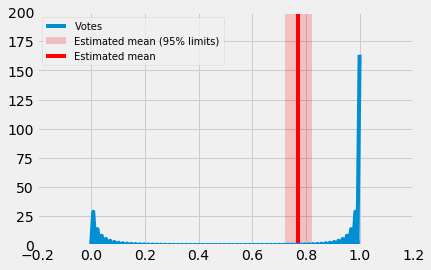

In [151]:
# Graphing
fig = plt.figure()
ax = fig.add_subplot(111)
sns.kdeplot(dem['anti-satellite-ban'], label='Votes')
ax.vlines(mean_confidence_interval.statistic, 0, 200, colors='r', label='Estimated mean')
ax.axvspan(mean_confidence_interval.minmax[0],mean_confidence_interval.minmax[1], facecolor='r', 
           alpha=0.2, label='Estimated mean (95% limits)')
ax.legend(fontsize=10)
ax.set_xlim([-0.2, 1.2])
ax.set_ylim([0, 200])
plt.show()

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)